# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

Installed in Python 3.10.12

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!  

In [1]:
import os
# os.environ['PATH'] = f"{os.environ['PATH']}:/home/student/.local/bin"
# os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.10/site-packages"

os.environ['PATH'] = f"{os.environ['PATH']}:/home/vidy/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/home/vidy/mambaforge/envs/py310/lib/python3.10/site-packages"


os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [2]:
!pip install .


Processing /home/vidy/RL_Tennis
  Preparing metadata (setup.py) ... done
  Created wheel for unityagents: filename=unityagents-0.4.0-py3-none-any.whl size=65045 sha256=dbf4ad8f139c64d96bca5c401c9f523d3563a6693e6d73605fe1471c90d2a549
  Stored in directory: /tmp/pip-ephem-wheel-cache-odbizsbi/wheels/31/c0/e9/326c4b16106fcda9c5aa0cd49b733ed030f2ccbc054f5c0b34
Successfully built unityagents
  Attempting uninstall: unityagents
    Found existing installation: unityagents 0.4.0
    Uninstalling unityagents-0.4.0:
      Successfully uninstalled unityagents-0.4.0


## SETUP ENVIRONMENT 
(The environment file embedded in this repository is only for Linux 20 agents)

In [3]:
## Setting up Environment  

from unityagents import UnityEnvironment

# Path to the Unity environment binary 
# (THE File Env PROVIDED IS ONLY FOR LINUX), feel free to replace with other env
env_path = "Tennis.x86_64"

env = UnityEnvironment(file_name=env_path, no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# examine the state space 
env_info = env.reset(train_mode=True, )[brain_name]
states = env_info.vector_observations
state_size = states.shape[1]
action_size = brain.vector_action_space_size
print("\n================ Agent and it's state =====================\n")
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Found path: /home/vidy/RL_Tennis/Tennis.x86_64
Mono path[0] = '/home/vidy/RL_Tennis/Tennis_Data/Managed'
Mono config path = '/home/vidy/RL_Tennis/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'ScreenSelector.so'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
Logging to /home/vidy/.config/unity3d/Unity Technologies/Unity Environment/Player.log

================ Agent and it's state =====================

There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## Run Actions randomly

In [4]:
import numpy as np

# Load the Unity environment
brain_name = env.brain_names[0]  
brain = env.brains[brain_name]   

# Reset the environment to get environment info for all brains
env_info = env.reset(train_mode=False)[brain_name]
state_size = env_info.vector_observations.shape[1]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
random_actions = np.random.uniform(-1, 1, (num_agents, action_size))
env_info = env.step(random_actions)[brain_name]

# Retrieve the next states, rewards, and done flags
next_states = env_info.vector_observations
rewards = env_info.rewards
dones = env_info.local_done

# Print the results
print("Next States:", next_states)
print("Rewards:", rewards)
print("Dones:", dones)
 


Next States: [[  0.           0.           0.           0.           0.
    0.           0.           0.          -7.38993645  -1.5
   -0.           0.           6.83172083   5.99607611  -0.
    0.          -9.80774021  -0.98316395 -24.17803383   6.21520042
    6.83172083   5.91759634 -24.17803383   6.21520042]
 [  0.           0.           0.           0.           0.
    0.           0.           0.          -6.70024681  -1.5
    0.           0.          -6.83172083   5.99607611   0.
    0.          -6.58661175  -1.55886006   1.1363622   -0.98100001
   -6.83172083   5.91759634   1.1363622   -0.98100001]]
Rewards: [0.0, 0.0]
Dones: [False, False]


## Init hyperparameters

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from IPython.display import clear_output

folder_path = "Report"
class Report:
    @staticmethod
    def reset():
        folder_path = "Report"
        file_path = os.path.join(folder_path, 'scores_log.txt')
        with open(file_path, 'w') as f:
            f.write("Episode logs:\n")  # reset logs
            
    @staticmethod
    def save_log(score, episode):
        file_path = os.path.join(folder_path, 'scores_log.txt')
        with open(file_path, 'a') as f:
            f.write(f"Episode {episode}: {score}\n")

    @staticmethod
    def plot_scores(scores):
        clear_output(wait=True)
        file_path = os.path.join(folder_path, 'scores_plot.png')
        plt.figure()
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.title("Training Progress")
        plt.savefig(file_path)
        plt.legend()
        plt.grid()
        plt.show()

    @staticmethod
    def save_model(agent_1, agent_2):
        torch.save(agent_1.actor_local.state_dict(), os.path.join(folder_path, 'agent1_actor.pth'))
        torch.save(agent_1.critic_local.state_dict(), os.path.join(folder_path, 'agent1_critic.pth'))
        torch.save(agent_2.actor_local.state_dict(), os.path.join(folder_path, 'agent2_actor.pth'))
        torch.save(agent_2.critic_local.state_dict(), os.path.join(folder_path, 'agent2_critic.pth'))
    
    @staticmethod
    def load_model(agent_1, agent_2, folder_path='Report'):
        """
        Function to load model, useful for continue training from previous checkpoint
        """
        agent_1.actor_local.load_state_dict(torch.load(os.path.join(folder_path, 'agent1_actor.pth')))
        agent_1.critic_local.load_state_dict(torch.load(os.path.join(folder_path, 'agent1_critic.pth')))
        agent_1.actor_target.load_state_dict(torch.load(os.path.join(folder_path, 'agent1_actor.pth')))
        agent_1.critic_target.load_state_dict(torch.load(os.path.join(folder_path, 'agent1_critic.pth')))
        
        agent_2.actor_local.load_state_dict(torch.load(os.path.join(folder_path, 'agent2_actor.pth')))
        agent_2.critic_local.load_state_dict(torch.load(os.path.join(folder_path, 'agent2_critic.pth')))
        agent_2.actor_target.load_state_dict(torch.load(os.path.join(folder_path, 'agent2_actor.pth')))
        agent_2.critic_target.load_state_dict(torch.load(os.path.join(folder_path, 'agent2_critic.pth')))


## Start Training

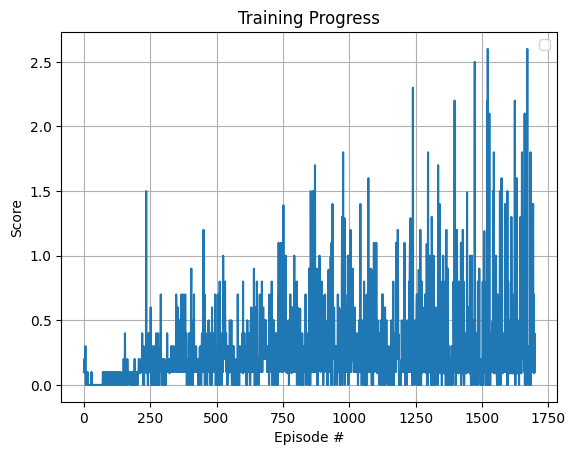

In [ ]:
from Agent import DDPGAgent
from collections import  deque

GAMMA=0.99
LEARNING_RATE=1e-3
TAU=0.3
ALPHA=0.6
BETA=0.4
DEVICE = 'cuda'
BUFFER_SIZE = 1_000_000
BATCH_SIZE=256
ALPHA=0.7
scores = []
Report.reset()

agent_1 = DDPGAgent(state_size, action_size, random_seed=0, device=DEVICE,
                    learning_rate=LEARNING_RATE,tau=TAU,
                    buffer_size=BUFFER_SIZE, BATCH_SIZE=BATCH_SIZE, gamma=GAMMA)
agent_2 = DDPGAgent(state_size, action_size, random_seed=1, device=DEVICE,
                    learning_rate=LEARNING_RATE,tau=TAU,
                    buffer_size=BUFFER_SIZE, BATCH_SIZE=BATCH_SIZE, gamma=GAMMA)

# Load pretrained weights if available
folder_path = 'Report'
if os.path.exists(os.path.join(folder_path, 'agent1_actor.pth')):
    print("Loading pretrained models...")
    Report.load_model(agent_1, agent_2, folder_path)
else:
    print("No pretrained models found. Starting from scratch.")


print('STart training')
# Big episode number, basically I want to run forever and terminate it when I am happy with the result
n_episodes= 20_000
for episode in range(1, n_episodes + 1):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    agent_1.reset()
    agent_2.reset()
    episode_scores = np.zeros(2)

    while True:
        action_1 = agent_1.act(states[0])
        action_2 = agent_2.act(states[1])
        actions = np.concatenate((action_1, action_2), axis=0)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done

        # Pass concatenated states and actions to critics (centralized)
        states_concat = np.concatenate(states, axis=0)
        next_states_concat = np.concatenate(next_states, axis=0)
        rewards_concat = np.sum(rewards) 
        dones_concat = np.any(dones)  

        # Agents learn
        agent_1.step(states_concat, actions, rewards_concat, next_states_concat, dones_concat)
        agent_2.step(states_concat, actions, rewards_concat, next_states_concat, dones_concat)

        # Update states and scores
        states = next_states
        episode_scores += rewards

        if np.any(dones):
            break

    max_score = np.max(episode_scores)
    scores.append(max_score)

    if episode % 100 == 0: 
        print(f"Episode {episode}\tScore: {max_score:.2f}\tAverage Score: {np.mean(scores[-100:]):.2f}")
        Report.plot_scores(scores)
        Report.save_log(scores[-1], episode)
        if np.mean(scores[-100:]) >= 1.0:
            Report.save_model(agent_1, agent_2)

